In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
cameraCalibration = pickle.load( open("./camera_cal/cam_calib_pickle.p", 'rb' ) )
mtx, dist = map(cameraCalibration.get, ('mtx', 'dist'))

In [3]:
#Load test images
test_image_files = glob.glob('./test_images/*.jpg')
print("{} Test images loaded".format(len(test_image_files)))

test_images=[]

for f in test_image_files:
    t=cv2.imread(f)
    t=cv2.cvtColor(np.array(t), cv2.COLOR_BGR2RGB)
    test_images.append(t)

8 Test images loaded


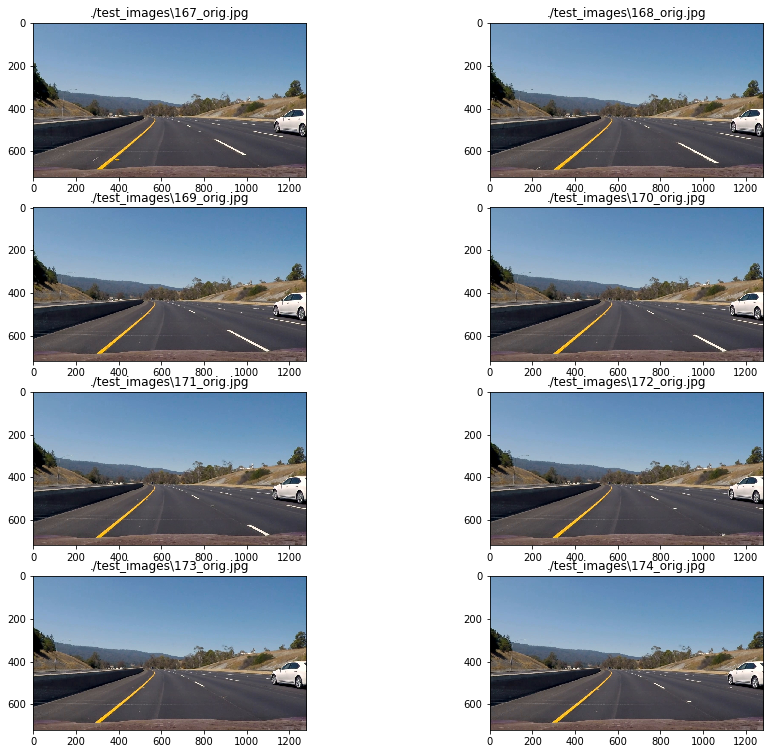

In [4]:
def showImages(images, cols = 4, rows = 5, figsize=(15,10), cmap=None):
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax,indx in zip(axes.flat,indexes):
            image = images[indx]
            if cmap == None:
                ax.imshow(image)
            else:
                ax.imshow(image, cmap=cmap)
            ax.set_title(test_image_files[indx])
showImages(test_images, 2, 4, (15, 13))

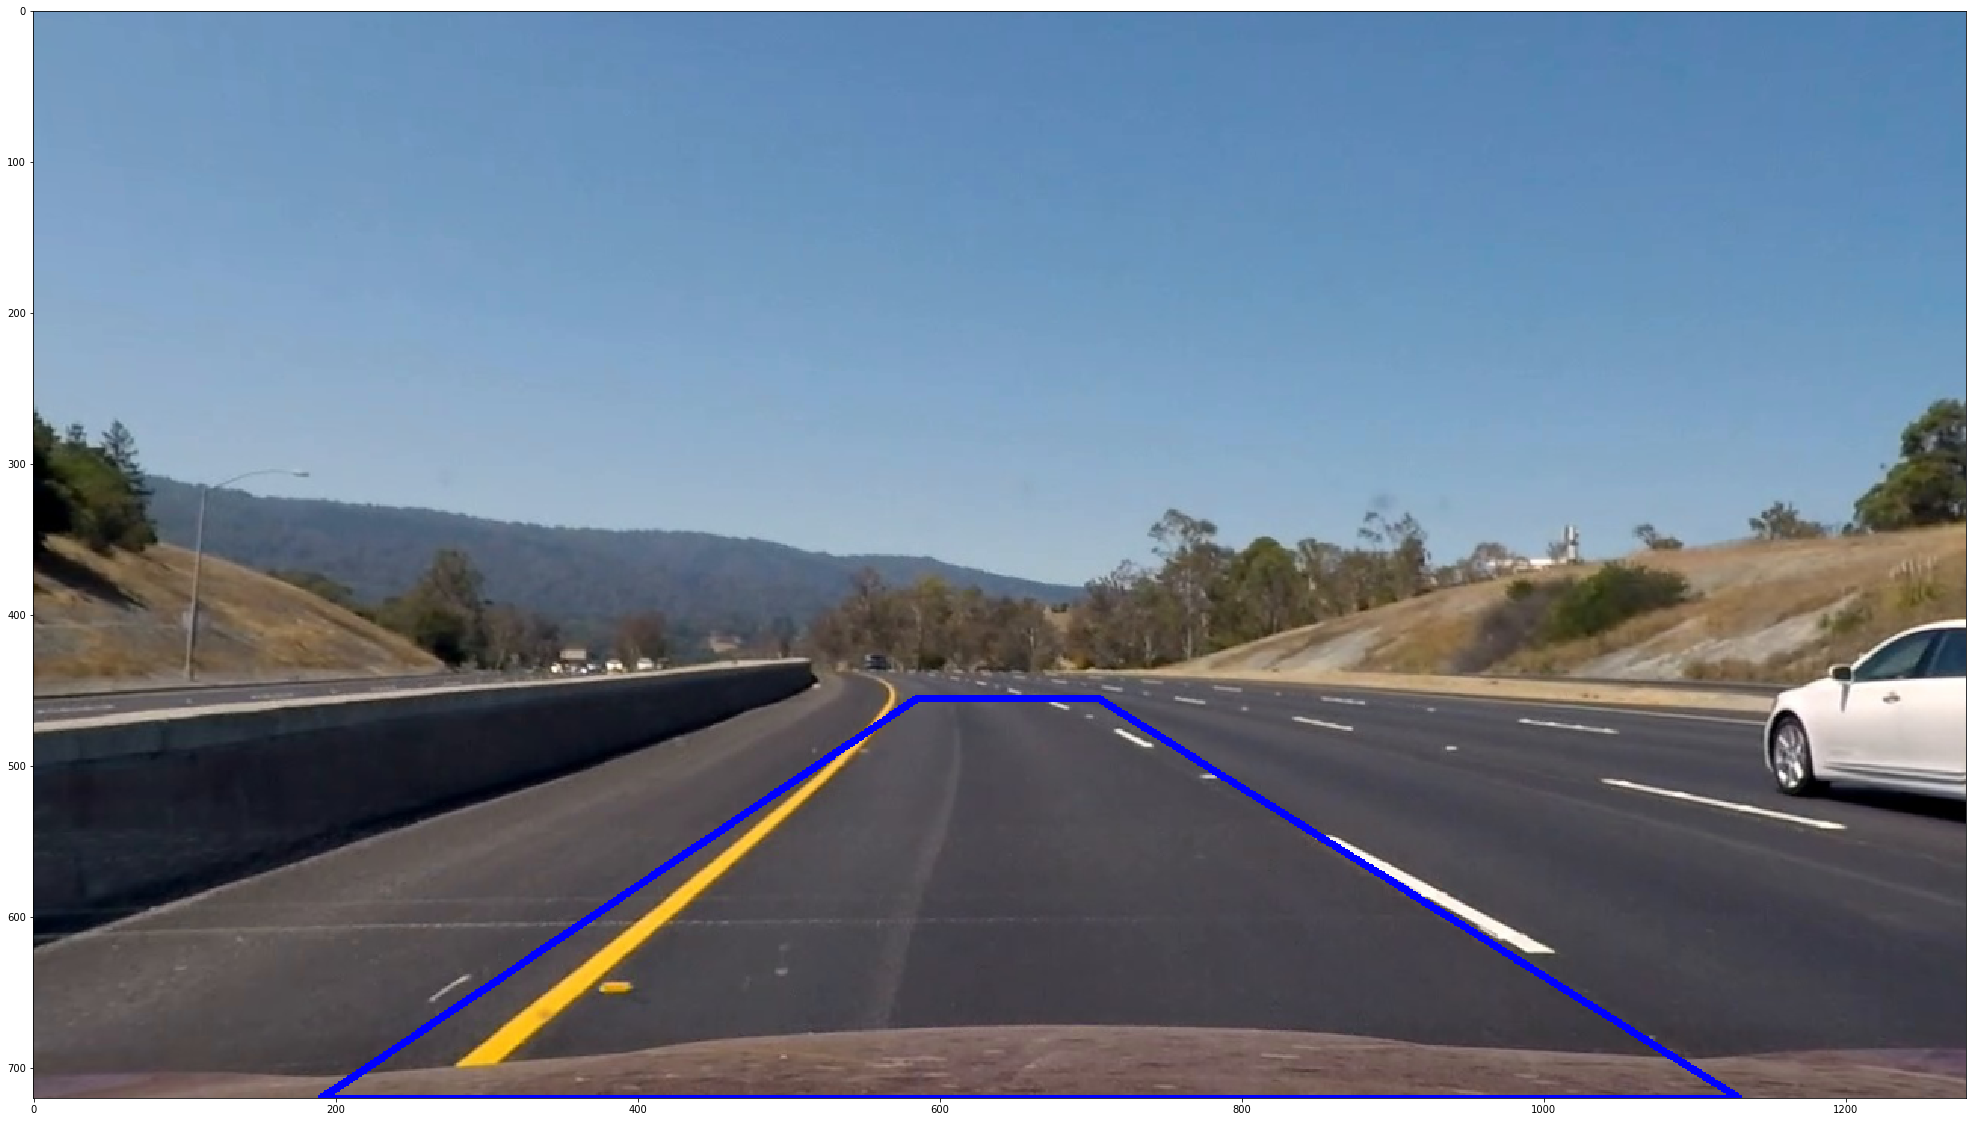

In [5]:
indx = 0
orig_img = test_images[indx]
undist = cv2.undistort(orig_img, mtx, dist, None, mtx)

xSize, ySize, _ = undist.shape
copy = undist.copy()

color = [0, 0, 255]
w = 3
left1=(190, 720)
left2=(585, 455)
right1=(705, 455)
right2=(1130,720)
cv2.line(copy, left1, left2, color, w)
cv2.line(copy, left2, right1, color, w)
cv2.line(copy, right1, right2, color, w)
cv2.line(copy, right2, left1, color, w)
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(copy)


[[ 585.  455.]
 [ 705.  455.]
 [1130.  720.]
 [ 190.  720.]]
[[ 200.    0.]
 [1080.    0.]
 [1080.  720.]
 [ 200.  720.]]


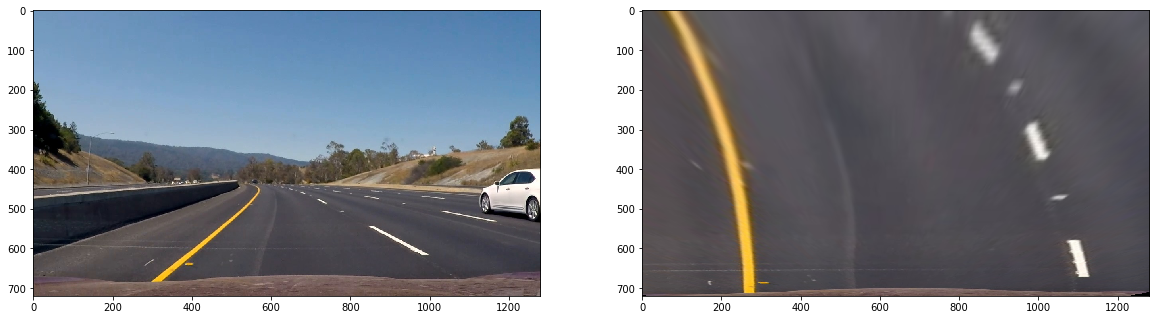

In [6]:
gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
src = np.float32([ 
    left2,
    right1,
    right2,
    left1
])
print(src)
img_size = (gray.shape[1], gray.shape[0])
offset = 200
dst = np.float32([
    [offset, 0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]], 
    [offset, img_size[1]]
])
print(dst)

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist, M, img_size)

fig, axes = plt.subplots(ncols=2, figsize=(20,10))
axes[0].imshow(orig_img)
axes[1].imshow(warped)

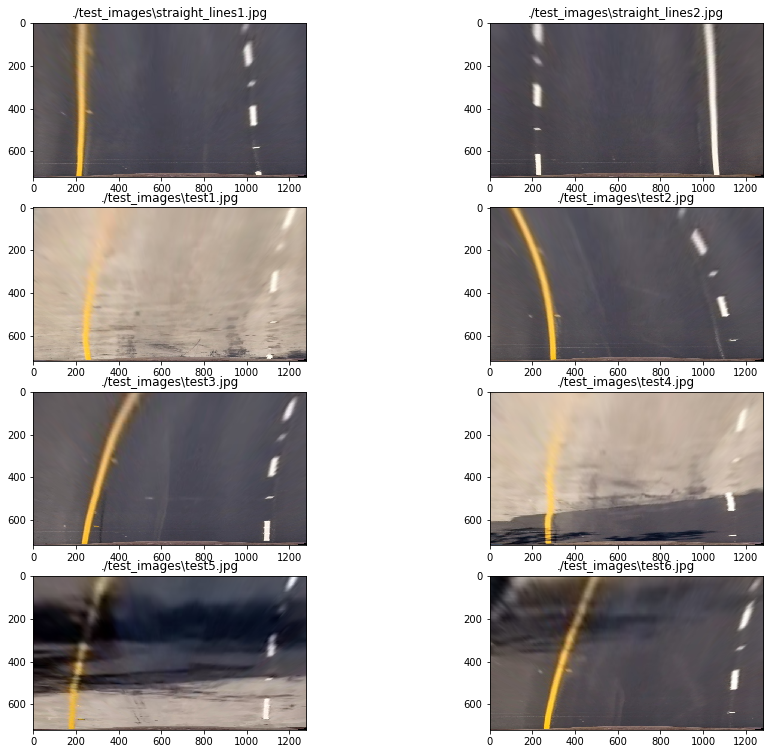

In [30]:
persptransform_images=[]
src = np.float32([ 
    left2,
    right1,
    right2,
    left1
])
offset = 200

for img in test_images:
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
    img_size = (gray.shape[1], gray.shape[0])
    dst = np.float32([
    [offset, 0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]], 
    [offset, img_size[1]]
    ])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(undist, M, img_size)
    persptransform_images.append(warped)

showImages(persptransform_images, 2, 4, (15, 13))

In [34]:
file = open('./camera_cal/persptransform_images.p','wb')
pickle.dump(persptransform_images,file)
file.close

<function BufferedWriter.close>